# コメント

In [1]:
date = '20190123_02'
change_point = '''報酬の計算をゲームごとではないく、ポイントごとに行った。'''
rewark = '''報酬の収束が見られなくなった。報酬の計算をゲームごとに一律にした方がよさそう。'''

# インポート

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# パス指定

In [3]:
path_csv = '../CSV/'
path_graph = '../Graph/'

# データ読み込み

In [6]:
game_reward_df = pd.read_csv(path_csv + 'info_df.csv')

# データ加工

In [7]:
game_max = game_reward_df['game'].max()

In [8]:
server_df = game_reward_df[game_reward_df['server']==1]
receiver_df = game_reward_df[game_reward_df['server']==0]

In [9]:
server_game = server_df['game'].ravel()
server_reward = server_df['reward'].ravel()

In [10]:
receiver_game = receiver_df['game'].ravel()
receiver_reward = receiver_df['reward'].ravel()

In [11]:
#移動平均
num = 30
def moving_average(num, y):
    b = np.ones(num) / num

    y2 = np.convolve(y, b, mode='same')
    
    return y2

In [12]:
server_reward_ma = moving_average(num, server_reward)

In [13]:
receiver_reward_ma = moving_average(num, receiver_reward)

# 可視化

## サービス時の報酬推移

C:\Users\Yuya\Anaconda3\envs\RL_pytorch_03\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


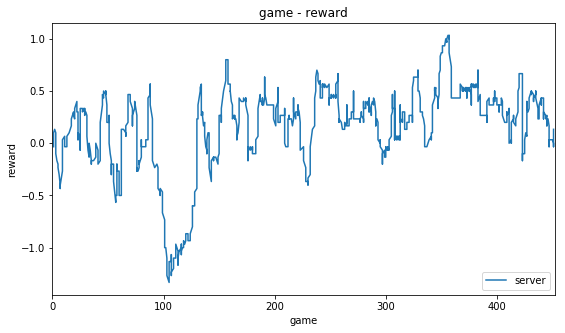

In [14]:
fig = plt.figure(figsize=(9,5)) #図の生成
ax = fig.add_subplot(1,1,1) #軸の指定
 
ax.plot(server_game, server_reward_ma, label='server') #データのプロット
#ax.plot(receiver_game, receiver_reward_ma,label='receiver') #データのプロット
 
ax.set_xlim([0, game_max]) #x軸の範囲
ax.set_ylim([None, None]) #y軸の範囲
 
ax.set_title('game - reward') #グラフのタイトル
ax.set_xlabel('game') #x軸の名前
ax.set_ylabel('reward') #y軸の名前
 
ax.legend(loc='lower right') #凡例の表示
plt.savefig(path_graph + 'server.png', bbox_inches="tight")
plt.show() #グラフの表示

## レシーブ時の報酬推移

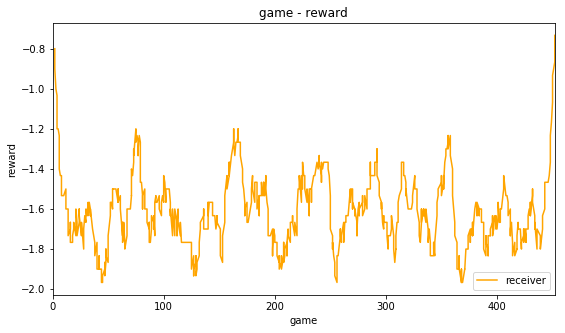

In [15]:
fig = plt.figure(figsize=(9,5)) #図の生成
ax = fig.add_subplot(1,1,1) #軸の指定
 
#ax.plot(server_game, server_reward_ma, label='server') #データのプロット
ax.plot(receiver_game, receiver_reward_ma,label='receiver', color='orange') #データのプロット

ax.set_xlim([0, game_max]) #x軸の範囲
ax.set_ylim([None, None]) #y軸の範囲
 
ax.set_title('game - reward') #グラフのタイトル
ax.set_xlabel('game') #x軸の名前
ax.set_ylabel('reward') #y軸の名前
 
ax.legend(loc='lower right') #凡例の表示
plt.savefig(path_graph + 'receiver.png', bbox_inches="tight")
plt.show() #グラフの表示

## サーブ＆レシーブ報酬推移

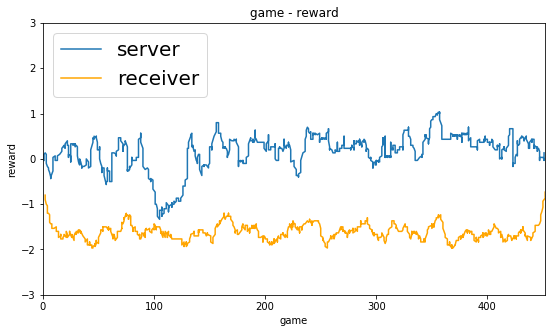

In [16]:
fig = plt.figure(figsize=(9,5)) #図の生成
ax = fig.add_subplot(1,1,1) #軸の指定
 
ax.plot(server_game, server_reward_ma, label='server') #データのプロット
ax.plot(receiver_game, receiver_reward_ma,label='receiver', color='orange') #データのプロット
 
ax.set_xlim([0, game_max]) #x軸の範囲
ax.set_ylim([-3, 3]) #y軸の範囲
 
ax.set_title('game - reward') #グラフのタイトル
ax.set_xlabel('game') #x軸の名前
ax.set_ylabel('reward') #y軸の名前
 
ax.legend(loc='upper left', fontsize=20) #凡例の表示

plt.savefig(path_graph + 'server_receiver.png',bbox_inches="tight")

plt.show() #グラフの表示

In [ ]:
s